In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import tensorflow as tf

In [9]:
# GPU
gpus = tf.config.experimental.list_physical_devices("GPU")
if gpus:
    tf.config.experimental.set_memory_growth(gpus[0], True)
    tf.config.set_visible_devices([gpus[0]], "GPU")

In [3]:
df = yf.download('MSFT', 
                      start='2013-01-01', 
                      end='2023-01-01', 
                      progress=False,)
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,27.250000,27.730000,27.150000,27.620001,22.668236,52899300
2013-01-03,27.629999,27.650000,27.160000,27.250000,22.364561,48294400
2013-01-04,27.270000,27.340000,26.730000,26.740000,21.945997,52521100
2013-01-07,26.770000,26.879999,26.639999,26.690001,21.904963,37110400
2013-01-08,26.750000,26.790001,26.459999,26.549999,21.790064,44703100
...,...,...,...,...,...,...
2022-12-23,236.110001,238.869995,233.940002,238.729996,237.614105,21207000
2022-12-27,238.699997,238.929993,235.830002,236.960007,235.852386,16688600
2022-12-28,236.889999,239.720001,234.169998,234.529999,233.433731,17457100


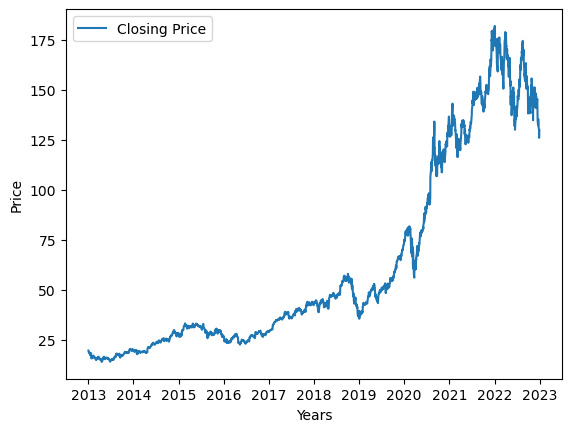

In [7]:
plt.plot(df.Close,label='Closing Price')
plt.xlabel('Years')
plt.ylabel('Price')
plt.legend()

In [164]:
#moving average for 100 days
ma100=df.Close.rolling(100).mean()
ma100

Date
2013-01-02           NaN
2013-01-03           NaN
2013-01-04           NaN
2013-01-07           NaN
2013-01-08           NaN
                 ...    
2022-12-23    150.515600
2022-12-27    150.157800
2022-12-28    149.764699
2022-12-29    149.412100
2022-12-30    149.062199
Name: Close, Length: 2518, dtype: float64

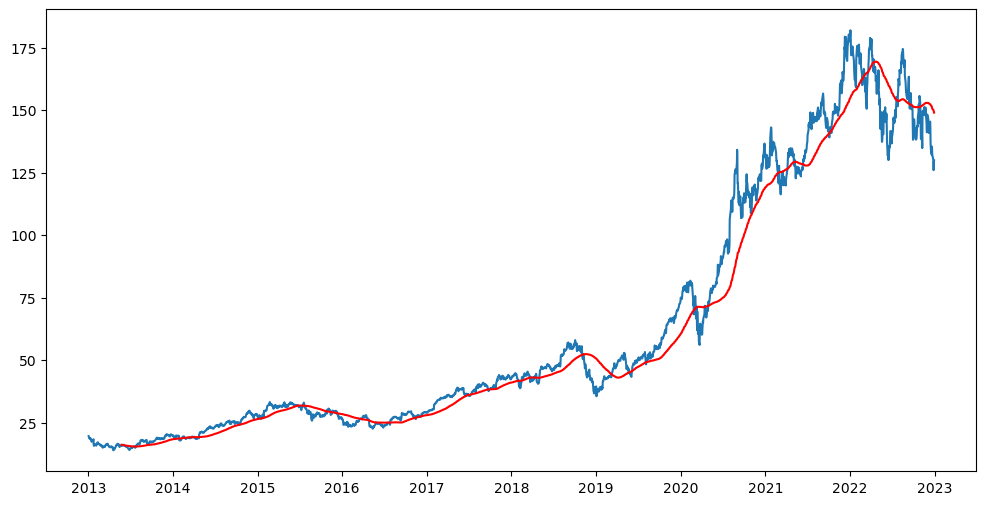

In [165]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

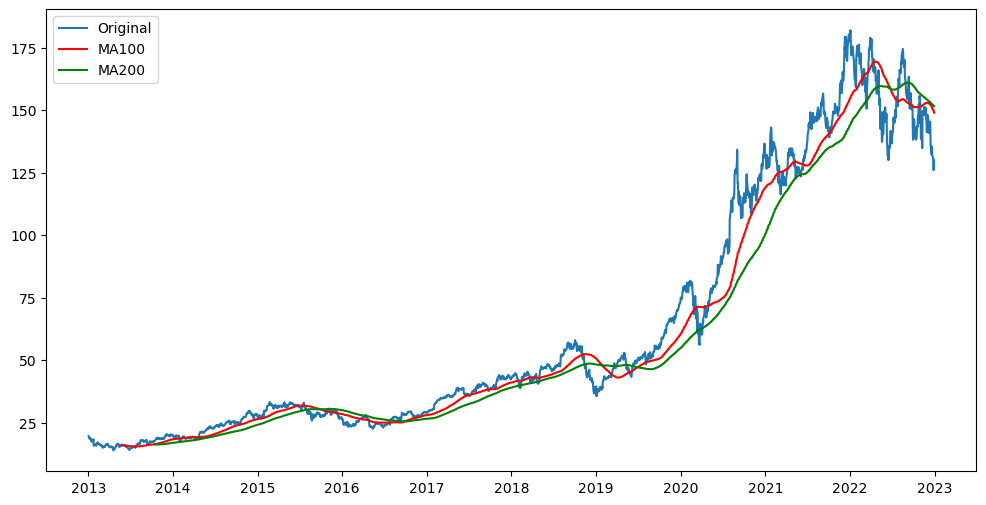

In [209]:
#moving average for 200 days
ma200=df.Close.rolling(200).mean()
plt.figure(figsize=(12,6))
plt.plot(df.Close,label='Original')
plt.plot(ma100,'r',label='MA100')
plt.plot(ma200,'g',label='MA200')
plt.legend()

In [167]:
df.shape

(2518, 6)

In [168]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2.518000e+03
mean,62.383387,63.087693,61.696664,62.416599,60.544589,1.713540e+08
std,48.683035,49.322128,48.051043,48.709794,49.173579,1.250497e+08
min,13.856071,14.271429,13.753571,13.947500,12.046195,3.519590e+07
25%,26.971250,27.219376,26.705000,26.983750,24.639017,9.188698e+07
50%,41.353750,41.872499,40.888750,41.313749,39.451433,1.301368e+08
75%,91.272499,92.881876,90.824377,91.526875,89.985533,2.045116e+08
max,182.630005,182.940002,179.119995,182.009995,180.683868,1.460852e+09


In [169]:
df.dropna()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,19.779285,19.821428,19.343929,19.608213,16.837114,560518000
2013-01-03,19.567142,19.631071,19.321428,19.360714,16.624594,352965200
2013-01-04,19.177500,19.236786,18.779642,18.821428,16.161528,594333600
2013-01-07,18.642857,18.903570,18.400000,18.710714,16.066452,484156400
2013-01-08,18.900356,18.996071,18.616072,18.761070,16.109699,458707200
...,...,...,...,...,...,...
2022-12-23,130.919998,132.419998,129.639999,131.860001,131.658981,63814900
2022-12-27,131.380005,131.410004,128.720001,130.029999,129.831772,69007800
2022-12-28,129.669998,131.029999,125.870003,126.040001,125.847855,85438400


Splitting into Training and Testing


In [4]:
data_training=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing=pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])
print(data_training.shape)
print(data_testing.shape)

(1762, 1)
(756, 1)


In [5]:
data_testing.head()

,Close
Date,
2020-01-02,160.619995
2020-01-03,158.619995
2020-01-06,159.029999
2020-01-07,157.580002
2020-01-08,160.089996


In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [7]:
data_training_array=scaler.fit_transform(data_training)

In [8]:
x_train=[]
y_train=[]
for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
x_train,y_train=np.array(x_train),np.array(y_train)

In [175]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate
from keras.models import Model
from keras import optimizers

In [176]:
lstm_input = Input(shape=(x_train.shape[1], 1), name='lstm_input')
inputs = LSTM(150, name='first_layer')(lstm_input)
inputs = Dense(1, name='dense_layer')(inputs)
output = Activation('linear', name='output')(inputs)
lstm_model = Model(inputs=lstm_input, outputs=output)
adam = optimizers.Adam()
lstm_model.compile(optimizer=adam, loss='mse')
lstm_model.fit(x=x_train, y=y_train, batch_size=15, epochs=30, shuffle=True, validation_split = 0.1)

Epoch 1/30
100/100 [==============================] - 8s 65ms/step - loss: 0.0053 - val_loss: 6.5201e-04
Epoch 2/30
100/100 [==============================] - 6s 60ms/step - loss: 3.2002e-04 - val_loss: 6.2948e-04
Epoch 3/30
100/100 [==============================] - 6s 61ms/step - loss: 3.0998e-04 - val_loss: 6.5560e-04
Epoch 4/30
100/100 [==============================] - 6s 65ms/step - loss: 2.8114e-04 - val_loss: 5.5124e-04
Epoch 5/30
100/100 [==============================] - 8s 79ms/step - loss: 2.7591e-04 - val_loss: 5.3300e-04
Epoch 6/30
100/100 [==============================] - 8s 77ms/step - loss: 3.1018e-04 - val_loss: 5.4978e-04
Epoch 7/30
100/100 [==============================] - 8s 85ms/step - loss: 2.5133e-04 - val_loss: 5.6657e-04
Epoch 8/30
100/100 [==============================] - 9s 90ms/step - loss: 2.4919e-04 - val_loss: 5.0045e-04
Epoch 9/30
100/100 [==============================] - 9s 94ms/step - loss: 2.2907e-04 - val_loss: 5.1798e-04
Epoch 10/30
100/100 [==

In [177]:
lstm_model.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_input (InputLayer)     [(None, 100, 1)]          0         
                                                                 
 first_layer (LSTM)          (None, 150)               91200     
                                                                 
 dense_layer (Dense)         (None, 1)                 151       
                                                                 
 output (Activation)         (None, 1)                 0         
                                                                 
Total params: 91351 (356.84 KB)
Trainable params: 91351 (356.84 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [178]:
#lstm_model.save('lstm.h5')

## Testing Data
we'll be using the last 100 days to predict the price of the stock for the next day. 

In [14]:
past_100_days=data_training.tail(100)
df_append=pd.DataFrame(data_testing)
final_df=pd.concat([past_100_days,df_append])
#final_df=past_100_days.append(data_testing,ignore_index=True)
input_data=scaler.fit_transform(final_df)
x_test=[]
y_test=[]
for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])
x_test,y_test=np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(756, 100, 1)
(756,)


## BIDIRECTIONAL LSTM

In [180]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Bidirectional

In [181]:
bi_input = Input(shape=(x_train.shape[1], 1), name='lstm_input')
inputs = Bidirectional(LSTM(150, name='first_layer'))(bi_input)
inputs = Dense(1, name='dense_layer')(inputs)
output = Activation('relu', name='output')(inputs)
bi_model = Model(inputs=bi_input, outputs=output)
adam = optimizers.Adam()
bi_model.compile(optimizer=adam, loss='mse')
bi_model.fit(x=x_train, y=y_train, batch_size=15, epochs=30, shuffle=True, validation_split=0.1)

Epoch 1/30
100/100 [==============================] - 18s 151ms/step - loss: 0.0042 - val_loss: 8.1567e-04
Epoch 2/30
100/100 [==============================] - 15s 150ms/step - loss: 6.5275e-04 - val_loss: 0.0018
Epoch 3/30
100/100 [==============================] - 15s 150ms/step - loss: 4.6280e-04 - val_loss: 6.0892e-04
Epoch 4/30
100/100 [==============================] - 16s 157ms/step - loss: 3.5096e-04 - val_loss: 0.0013
Epoch 5/30
100/100 [==============================] - 16s 163ms/step - loss: 2.5522e-04 - val_loss: 9.5268e-04
Epoch 6/30
100/100 [==============================] - 16s 165ms/step - loss: 2.8603e-04 - val_loss: 5.1211e-04
Epoch 7/30
100/100 [==============================] - 17s 166ms/step - loss: 2.4801e-04 - val_loss: 0.0014
Epoch 8/30
100/100 [==============================] - 17s 168ms/step - loss: 2.8826e-04 - val_loss: 4.8538e-04
Epoch 9/30
100/100 [==============================] - 16s 164ms/step - loss: 2.3534e-04 - val_loss: 4.6016e-04
Epoch 10/30
100/1

In [182]:
bi_model.summary()

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_input (InputLayer)     [(None, 100, 1)]          0         
                                                                 
 bidirectional_3 (Bidirecti  (None, 300)               182400    
 onal)                                                           
                                                                 
 dense_layer (Dense)         (None, 1)                 301       
                                                                 
 output (Activation)         (None, 1)                 0         
                                                                 
Total params: 182701 (713.68 KB)
Trainable params: 182701 (713.68 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [183]:
#bi_model.save('BI_LSTM.h5')

## GRU MODEL IMPLEMENTATION


In [184]:
from keras.layers import GRU
gru_input = Input(shape=(x_train.shape[1], 1), name='gru_input')
inputs = GRU(150, name='first_layer')(gru_input)
inputs = Dense(1, name='dense_layer')(inputs)
output = Activation('linear', name='output')(inputs)
gru_model = Model(inputs=gru_input, outputs=output)
adam = optimizers.Adam()
gru_model.compile(optimizer=adam, loss='mse')
gru_model.fit(x=x_train, y=y_train, batch_size=15, epochs=30, shuffle=True, validation_split=0.1)

Epoch 1/30
100/100 [==============================] - 15s 130ms/step - loss: 0.0051 - val_loss: 4.7914e-04
Epoch 2/30
100/100 [==============================] - 12s 121ms/step - loss: 1.7614e-04 - val_loss: 5.5153e-04
Epoch 3/30
100/100 [==============================] - 12s 121ms/step - loss: 1.5763e-04 - val_loss: 5.7817e-04
Epoch 4/30
100/100 [==============================] - 12s 121ms/step - loss: 1.6912e-04 - val_loss: 2.9148e-04
Epoch 5/30
100/100 [==============================] - 12s 122ms/step - loss: 1.4129e-04 - val_loss: 2.9566e-04
Epoch 6/30
100/100 [==============================] - 12s 122ms/step - loss: 1.4394e-04 - val_loss: 2.9226e-04
Epoch 7/30
100/100 [==============================] - 12s 120ms/step - loss: 1.5710e-04 - val_loss: 2.8829e-04
Epoch 8/30
100/100 [==============================] - 12s 121ms/step - loss: 1.3501e-04 - val_loss: 2.8235e-04
Epoch 9/30
100/100 [==============================] - 12s 122ms/step - loss: 1.4061e-04 - val_loss: 2.5455e-04
Epoch

In [185]:
gru_model.summary()

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_input (InputLayer)      [(None, 100, 1)]          0         
                                                                 
 first_layer (GRU)           (None, 150)               68850     
                                                                 
 dense_layer (Dense)         (None, 1)                 151       
                                                                 
 output (Activation)         (None, 1)                 0         
                                                                 
Total params: 69001 (269.54 KB)
Trainable params: 69001 (269.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [186]:
#gru_model.save('GRU.h5')

# XGBOOST + BILSTM

In [187]:
# Train an XGBoost model using the predicted values from the BiLSTM model as features
import xgboost as xgb
bi_pred=bi_model.predict(x_test)
bi_pred_train=bi_model.predict(x_train)
xgb_model = xgb.XGBRegressor()
xgb_model.fit(bi_pred_train, y_train, eval_set=[(bi_pred_train, y_train), (bi_pred,y_test)],verbose=False)
xgb_model.fit(bi_pred[:-1], y_test[1:])

52/52 [==============================] - 4s 81ms/step


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

## XGBOOST + GRU

In [188]:
# Train an XGBoost model using the predicted values from the BiLSTM model as features
import xgboost as xgb
gru_pred=gru_model.predict(x_test)
gru_pred_train=gru_model.predict(x_train)
xgb_model2 = xgb.XGBRegressor()
xgb_model2.fit(gru_pred_train, y_train, eval_set=[(gru_pred_train, y_train), (gru_pred,y_test)],verbose=False)
xgb_model2.fit(gru_pred[:-1], y_test[1:])

52/52 [==============================] - 3s 49ms/step


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

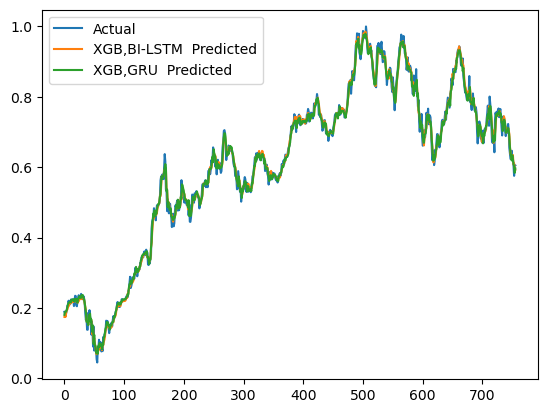

In [189]:
# Use the trained XGBoost model to make predictions on the test data
bi_xgb_predictions = xgb_model.predict(bi_pred)
# Combine the BiLSTM and XGBoost predictions
combined_predictions = np.concatenate((bi_pred[0:],bi_xgb_predictions[0:].reshape(-1, 1)), axis=1)
combined_predictions = np.mean(combined_predictions, axis=1)

xgb_gru_predictions=xgb_model2.predict(gru_pred)

combined_predictions2 = np.concatenate((gru_pred[0:],xgb_gru_predictions[0:].reshape(-1, 1)), axis=1)
combined_predictions2 = np.mean(combined_predictions2, axis=1)
# Plot the predicted and actual stock prices
import matplotlib.pyplot as plt
plt.plot(y_test, label='Actual')
plt.plot(combined_predictions, label='XGB,BI-LSTM  Predicted')
plt.plot(combined_predictions2, label='XGB,GRU  Predicted')
#plt.plot(y_predicted,label='lstm')
plt.legend()
plt.show()

# Testing and Validation

In [190]:
sc1=scaler.scale_

In [191]:
lstm_pred=lstm_model.predict(x_test)
lstm_pred.shape
bilstm_pred=bi_model.predict(x_test)
bilstm_pred.shape
gru_pred=gru_model.predict(x_test)
gru_pred.shape

24/24 [==============================] - 1s 50ms/step


(756, 1)

In [192]:
scale_factor=1/sc1
lstm_pred=lstm_pred*scale_factor
y_test=y_test*scale_factor
bilstm_pred=bilstm_pred*scale_factor
gru_pred=gru_pred*scale_factor

In [193]:
combined_predictions=combined_predictions*scale_factor
combined_predictions2=combined_predictions2*scale_factor

In [1]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original Price')
#plt.plot(bilstm_pred,'r',label='Bidirectional LSTM')
#plt.plot(lstm_pred,'g',linestyle='--',label='LSTM')
#plt.plot(gru_pred,'r',linestyle='--',label='GRU')
plt.plot(combined_predictions,'y',label='BI_XGB')
plt.plot(combined_predictions2,'pink',label='XGB_GRU')
plt.xlabel('Time (in days)')
plt.ylabel('Price')
plt.legend()
plt.show()

NameError: name 'plt' is not defined

# ERROR EVALUATION

In [195]:
import math
import numpy as np
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error,r2_score
def return_error(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    mae=mean_absolute_error(test,predicted)
    mape=mean_absolute_percentage_error(test,predicted)*100
    r2 = r2_score(test,predicted)
    print("The root mean squared error is {}.".format(rmse))
    print("The mean absolute error is {}.".format(mae))
    print("The mean absolute percentage error {}.".format(mape))
    print("R2 score is {}.".format(r2))

    return rmse,mae,mape,r2

In [196]:
rmse_LSTM=return_error(y_test,lstm_pred)
rmse_LSTM

The root mean squared error is 3.914687946735592.
The mean absolute error is 3.036802882276249.
The mean absolute percentage error 4.714627360405196.
R2 score is 0.98357604145309.


(3.914687946735592, 3.036802882276249, 4.714627360405196, 0.98357604145309)

In [197]:
rmse_BI=return_error(y_test,bilstm_pred)
rmse_BI

The root mean squared error is 3.0666873010211826.
The mean absolute error is 2.349598639632068.
The mean absolute percentage error 3.8546500223156746.
R2 score is 0.9899208819341576.


(3.0666873010211826, 2.349598639632068, 3.8546500223156746, 0.9899208819341576)

In [198]:
rmse_GRU=return_error(y_test,gru_pred)
rmse_GRU

The root mean squared error is 2.806574272949615.
The mean absolute error is 2.0905195586037646.
The mean absolute percentage error 3.440142105073992.
R2 score is 0.9915581696030892.


(2.806574272949615, 2.0905195586037646, 3.440142105073992, 0.9915581696030892)

In [199]:
rmse_xgb=return_error(y_test,combined_predictions)

The root mean squared error is 2.333832408528641.
The mean absolute error is 1.7806085214298109.
The mean absolute percentage error 2.9707880621396003.
R2 score is 0.9941625540070901.


In [200]:
rmse_gru_xgb=return_error(y_test,combined_predictions2)

The root mean squared error is 2.234826164580159.
The mean absolute error is 1.682649560896441.
The mean absolute percentage error 2.8564146717130403.
R2 score is 0.9946473229973488.


In [201]:
error_df=pd.DataFrame(columns=('Model','RMSE'))
error_data=[('LSTM',rmse_LSTM[0],rmse_LSTM[1],rmse_LSTM[2],rmse_LSTM[3]),
            ('Bi-LSTM',rmse_BI[0],rmse_BI[1],rmse_BI[2],rmse_BI[3]),
            ('GRU',rmse_GRU[0],rmse_GRU[1],rmse_GRU[2],rmse_GRU[3]),
            ('Bi-LSTM XGBOOST',rmse_xgb[0],rmse_xgb[1],rmse_xgb[2],rmse_xgb[3]),
            ('GRU XGBOOST',rmse_gru_xgb[0],rmse_gru_xgb[1],rmse_gru_xgb[2],rmse_gru_xgb[3])]
error_df=pd.DataFrame(error_data,columns=('Model','RMSE','MAE','MAPE','R2'))

In [202]:
error_df

,Model,RMSE,MAE,MAPE,R2
0,LSTM,3.914688,3.036803,4.714627,0.983576
1,Bi-LSTM,3.066687,2.349599,3.854650,0.989921
2,GRU,2.806574,2.090520,3.440142,0.991558
3,Bi-LSTM XGBOOST,2.333832,1.780609,2.970788,0.994163
4,GRU XGBOOST,2.234826,1.682650,2.856415,0.994647
